## Employee Salary Analysis <br>

**Code by:** &emsp;  Ricardo G. Mora, Jr. 11/13/2021 <br>
**Data from:** &emsp;  EmployeeDB (in postgresql)

In [2]:
# Dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

**Before running this cell:** <br>
&emsp; **You must manually set your database password here or place it in a file called "config.py"**

In [3]:
# Define name and location of employee database:
program = 'postgresql'
user = 'postgres'
where = 'localhost'
database = 'EmployeesDB'

# Retrieve database password from config file:
from config import password

# Manually set password if not contained in a config file:
# password = ""

In [4]:
# Set database connection:
engine = create_engine(f'{program}://{user}:{password}@{where}/{database}')
conn = engine.connect()

In [5]:
# Read 'titles' table into a dataframe:
titlesDF = pd.read_sql("select * from titles", conn)
titlesDF

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [6]:
# Read 'employees' table into a dataframe:
employeesDF = pd.read_sql("select * from employees", conn)
employeesDF.head(5)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [7]:
# Read 'salaries' table into a dataframe:
salariesDF = pd.read_sql("select * from salaries", conn)
salariesDF.head(5)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [8]:
# Merge all three dataframes into a single dataframe:
employeesDF.rename(columns = {"emp_title_id":"title_id"}, inplace=True)
employeesFullDF = pd.merge(employeesDF, titlesDF, how='inner', on='title_id')
employeesFullDF = pd.merge(employeesFullDF, salariesDF, how='inner', on='emp_no')
employeesFullDF.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016


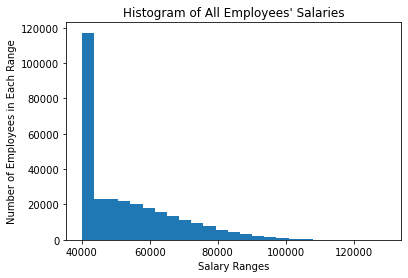

In [9]:
# Plot a histogram of employees salary ranges:
histogram1 = plt.hist(employeesFullDF["salary"], bins=25)
plt.xlabel("Salary Ranges")
plt.ylabel("Number of Employees in Each Range")
plt.title("Histogram of All Employees' Salaries")
plt.show()

It seems unlikely that so many employees only earned the base salary of 40,000.

In [10]:
# Display summary statistics for employee salaries for each job title:
avgsalaryDF = employeesFullDF.groupby("title").describe()["salary"]
avgsalaryDF

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Assistant Engineer,5835.0,48564.434447,10281.259519,40000.0,40000.00,44588.0,54671.50,99683.0
Engineer,47303.0,48535.336511,10340.663069,40000.0,40000.00,44478.0,54645.00,100683.0
Manager,24.0,51531.041667,12068.128725,40000.0,40000.00,48458.5,60358.75,72446.0
Senior Engineer,97747.0,48506.799871,10252.482143,40000.0,40000.00,44502.0,54605.00,110449.0
Senior Staff,26583.0,58550.172704,16473.869221,40000.0,41242.00,56585.0,70632.50,127238.0
Staff,107384.0,58465.382850,16499.506888,40000.0,41012.75,56407.0,70530.50,129492.0
Technique Leader,15148.0,48582.896092,10315.342481,40000.0,40000.00,44546.0,54960.25,104065.0


It seems unlikely that only 24 managers could oversee 300,000 employees.<br>
It also seems unlikely that the highest paid manager made significantly less than the highest paid person in the other job types.

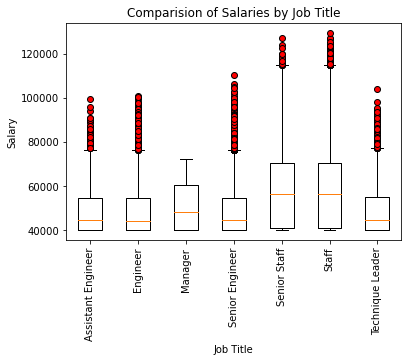

In [11]:
# Diplay a box & whisker diagram of salaries for each job title:
salariesbytype = []
for jobtype in avgsalaryDF.index:
    salariesbytype.append(employeesFullDF.loc[employeesFullDF["title"]==jobtype, "salary"])
    
boxplot = plt.boxplot(salariesbytype, labels=avgsalaryDF.index, flierprops={"markerfacecolor": "red"})
plt.title("Comparision of Salaries by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

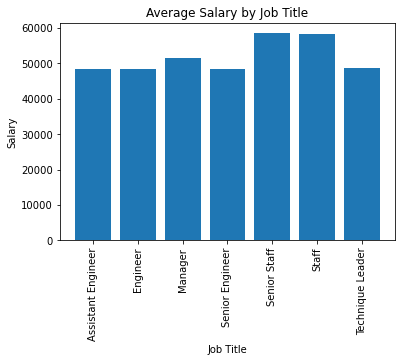

In [12]:
# Display a bar chart for average salary for each job title:
barchart1 = plt.bar(avgsalaryDF.index, avgsalaryDF["mean"])
plt.xticks(rotation=90)
plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.show()

In [13]:
# Find the name of employee # 499942:
firstname = employeesFullDF.loc[employeesFullDF["emp_no"] == 499942, "first_name"].values[0]
lastname = employeesFullDF.loc[employeesFullDF["emp_no"] == 499942, "last_name"].values[0]
print(f"{firstname} {lastname}")

April Foolsday
